In [ ]:
import random as rd
%pylab inline
import seaborn as sns

Hoeffding Inequality
Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin inde- pendently 10 times. Focus on 3 coins as follows: c1 is the first coin flipped, crand is a coin chosen randomly from the 1,000, and cmin is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie). Let ν1, νrand, and νmin be the fraction of heads obtained for the 3 respective coins out of the 10 tosses.
Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and νmin (note that crand and cmin will change from run to run).

1. The average value of νmin is closest to:

    - [a] 0

    - [b] 0.01

    - [c] 0.1

    - [d] 0.5

    - [e] 0.67

2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding
Inequality?

    - [a] c1 only

    - [b] crand only

    - [c] cmin only

    - [d] c1 and crand

    - [e] cmin and crand



In [ ]:
class Flipper(object):

    def __init__(self, total_coins):
        self.total_coins = total_coins

    def _flipSingleCoin(self):
        return(rd.choice(['h', 't']))

    def _get_HeadsFraction(self, single_trial):
        return(single_trial.count('h') / len(single_trial))

    def flipAllCoins(self, trials=10):
        results = []
        for coin in range(self.total_coins):
            sequence = []
            for trial in range(trials):
                sequence.append(self._flipSingleCoin())
            results.append(sequence)
        return(results)

    def pick_TheThreeCoins(self, results):
        c_1 = results[0]
        c_rand = rd.sample(results, k=1)[0]
        c_min = results[0]
        n_heads = c_min.count('h')
        for r in results:
            new_n_heads = r.count('h')
            if new_n_heads < n_heads:
                c_min = r
                n_heads = new_n_heads
        return(c_1, c_rand, c_min)


In [ ]:
ITER = 100000
v_1_list = []
v_rand_list = []
v_min_list = []
for _ in range(ITER):
    p = Flipper(total_coins=1000)
    r = p.flipAllCoins(trials=10)
    c_1, c_rand, c_min = p.pick_TheThreeCoins(r)
    v_1_list.append(p._get_HeadsFraction(c_1))
    v_rand_list.append(p._get_HeadsFraction(c_rand))
    v_min_list.append(p._get_HeadsFraction(c_min))

In [ ]:
sns.distplot(np.array(v_min_list), hist=False, label='$\\nu_{min}$')
sns.distplot(np.array(v_1_list), hist=False, label='$\\nu_{1}$')
sns.distplot(np.array(v_rand_list), hist=False, label='$\\nu_{rand}$')
plt.legend()

Linear regression

In [ ]:
values = np.random.uniform(-1, 1, size=(100,2))

In [10]:
p = LinearRegression(N_points=10)

In [12]:
points, V = p.generate_points()
w = p.estimate_line(points)

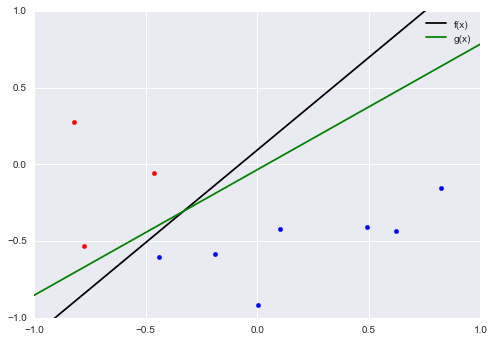

In [13]:
p.plot()

In [14]:
foo = p.estimate_Ein()

In [15]:
foo

0.0

In [20]:
N_ITER = 1000
Ein_fraction_count = []
Eout_fraction_count = []
w_list = []
V_list = []
for _ in range(0, N_ITER):
    p = LinearRegression(N_points=100)
    points, V = p.generate_points()
    w = p.estimate_line(points)
    w_list.append(w)
    V_list.append(V)
    errors = 100 - np.count_nonzero(np.sign(w.T.dot(points[:, 0:3].T)) == points[:, 3])
    Ein_fraction_count.append(errors / 100)

    # Now generate 1000 fresh points
    new_points = LinearRegression(1000).generate_points()[0][:, 0:3]
    errors_outside = 1000 - np.count_nonzero(np.sign(w.T.dot(new_points.T)) == np.sign(V.T.dot(new_points.T)))
    Eout_fraction_count.append(errors_outside / 1000)

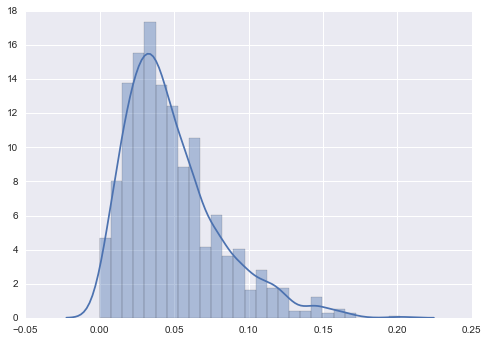

In [21]:
sns.distplot(np.array(Eout_fraction_count))

In [22]:
np.array(Eout_fraction_count).mean()

0.048596000000000014

# Perceptron

In [23]:
def pla(w, points):
    errors = len(points) - np.count_nonzero(np.sign(w.T.dot(points[:, 0:3].T)) == points[:, 3])
    it = 0
    while errors != 0:
        missclassified_points = points[np.sign(w.T.dot(points[:, 0:3].T)) != points[:, 3]]
        random_missclass_point = missclassified_points[random.randrange(0, len(missclassified_points))]
        #print('Errors before update: %d' % errors)
        w += random_missclass_point[3] * random_missclass_point[0:3]
        it += 1
        errors = len(points) - np.count_nonzero(np.sign(w.T.dot(points[:, 0:3].T)) == points[:, 3])
        #print('Errors after update: %d' % errors)
    return(w, it)

In [24]:
its = []
for _ in range(0, 1000):
    p = LinearRegression(10)
    points, V = p.generate_points()
    w = p.estimate_line(points)
    its.append(pla(w, points)[1])

AttributeError: module 'numpy.random' has no attribute 'randrange'

In [ ]:
np.array(its).mean()

# Nonlinear Transformation

In these problems, we again apply Linear Regression for classification. Consider the
target function:

$$f(x_1, x_2) = sign(x_1^2 + x_2^2 - 0.6)$$

Generate a training set of N = 1000 points on X = [−1, 1] × [−1, 1] with a uniform probability of picking each x ∈ X . Generate simulated noise by flipping the sign of the output in a randomly selected 10% subset of the generated training set.


In [1]:
from LinearRegression import LinearRegression
import random as rd
%pylab inline
import seaborn as sns

/Users/je714/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:461: UserWarning: matplotlibrc ps.usedistiller can not be set to xpdf unless xpdf-3.0 or later is installed on your system
  'your system') % pdftops_req)


Populating the interactive namespace from numpy and matplotlib


In [2]:
p = LinearRegression(1000)
points = p.generate_Noisy_points()
w = p.estimate_line(points)

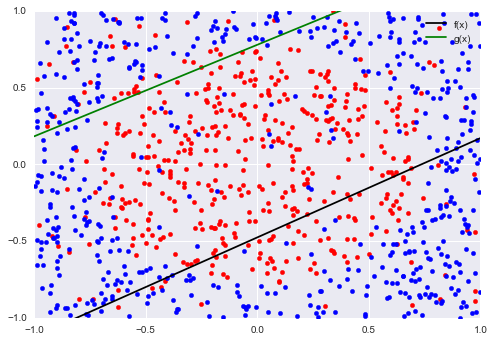

In [3]:
p.plot()

In [4]:
p.estimate_Ein()

0.547

In [ ]:
Ein_list = []
for _ in range(0, 1000):
    p = LinearRegression(1000)
    points = p.generate_Noisy_points()
    w = p.estimate_line()
    Ein_list.append(p.estimate_Ein())

In [ ]:
np.array(Ein_list).mean()

In [ ]:
sns.distplot(np.array(Ein_list))

## Now transform data

In [9]:
p = LinearRegression(1000)
points = p.generate_Noisy_points()
trans_points = p.transformInput()
w_lin = p.estimate_line(points)
w_nonlin = p.estimate_line(trans_points)

In [19]:
x1, x2 = [rd.uniform(-1, 1) for i in range(2)]

In [29]:
hyp_dict = {
    'g_a' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.50*x1*x1 + 1.50*x2*x2)),
    'g_b' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.50*x1*x1 + 15.0*x2*x2)),
    'g_c' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 15.0*x1*x1 + 1.50*x2*x2)),
    'g_d' : int(np.sign(-1 - 1.50*x1 + 0.08*x2 + 0.13*x1*x2 + 0.05*x1*x1 + 0.05*x2*x2)),
    'g_e' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 1.50*x1*x2 + 0.15*x1*x1 + 0.15*x2*x2))
}

In [30]:
w_nonlin

array([-0.98320865,  0.01177245, -0.02074938,  0.1391018 ,  1.55025927,
        1.56816626])

In [31]:
rand_point = np.array([1, x1, x2, x1*x2, x1*x1, x1*x2])

In [35]:
my_pred = np.sign(w_nonlin.T.dot(rand_point))

In [40]:
hyp_count = {
    'g_a': 0,
    'g_b': 0,
    'g_c': 0,
    'g_d': 0,
    'g_e': 0
}

for hyp_name, hyp_value in hyp_dict.items():
    if hyp_value == my_pred:
        hyp_count[hyp_name] += 1

In [41]:
hyp_count

{'g_a': 1, 'g_b': 0, 'g_c': 1, 'g_d': 1, 'g_e': 1}

In [50]:
for _ in range(0, 15):
    p = LinearRegression(1000)
    points = p.generate_Noisy_points()
    trans_points = p.transformInput()
    w_nonlin = p.estimate_line(trans_points)

    hyp_count = {
        'g_a': 0,
        'g_b': 0,
        'g_c': 0,
        'g_d': 0,
        'g_e': 0
    }
    
    for _ in range(0, 1000):
        x1, x2 = [rd.uniform(-1, 1) for i in range(2)]
        rand_point = np.array([1, x1, x2, x1*x2, x1*x1, x1*x2])
        my_pred = np.sign(w_nonlin.T.dot(rand_point))
        hyp_dict = {
            'g_a' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.50*x1*x1 + 1.50*x2*x2)),
            'g_b' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.50*x1*x1 + 15.0*x2*x2)),
            'g_c' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 15.0*x1*x1 + 1.50*x2*x2)),
            'g_d' : int(np.sign(-1 - 1.50*x1 + 0.08*x2 + 0.13*x1*x2 + 0.05*x1*x1 + 0.05*x2*x2)),
            'g_e' : int(np.sign(-1 - 0.05*x1 + 0.08*x2 + 1.50*x1*x2 + 0.15*x1*x1 + 0.15*x2*x2))
        }
        for hyp_name, hyp_value in hyp_dict.items():
            if hyp_value == my_pred:
                hyp_count[hyp_name] += 1
    print(hyp_count)

{'g_a': 682, 'g_e': 856, 'g_b': 353, 'g_c': 363, 'g_d': 808}
{'g_a': 692, 'g_e': 839, 'g_b': 372, 'g_c': 386, 'g_d': 779}
{'g_a': 686, 'g_e': 838, 'g_b': 344, 'g_c': 369, 'g_d': 795}
{'g_a': 695, 'g_e': 838, 'g_b': 386, 'g_c': 388, 'g_d': 796}
{'g_a': 724, 'g_e': 823, 'g_b': 386, 'g_c': 422, 'g_d': 787}
{'g_a': 703, 'g_e': 859, 'g_b': 359, 'g_c': 358, 'g_d': 798}
{'g_a': 724, 'g_e': 842, 'g_b': 384, 'g_c': 376, 'g_d': 782}
{'g_a': 699, 'g_e': 846, 'g_b': 366, 'g_c': 381, 'g_d': 767}
{'g_a': 710, 'g_e': 819, 'g_b': 398, 'g_c': 412, 'g_d': 790}
{'g_a': 711, 'g_e': 834, 'g_b': 385, 'g_c': 412, 'g_d': 798}
{'g_a': 698, 'g_e': 845, 'g_b': 370, 'g_c': 371, 'g_d': 785}
{'g_a': 699, 'g_e': 833, 'g_b': 376, 'g_c': 385, 'g_d': 796}
{'g_a': 708, 'g_e': 825, 'g_b': 391, 'g_c': 414, 'g_d': 765}
{'g_a': 739, 'g_e': 808, 'g_b': 403, 'g_c': 396, 'g_d': 762}
{'g_a': 710, 'g_e': 834, 'g_b': 382, 'g_c': 398, 'g_d': 785}


In [44]:
max(hyp_count)

'g_e'